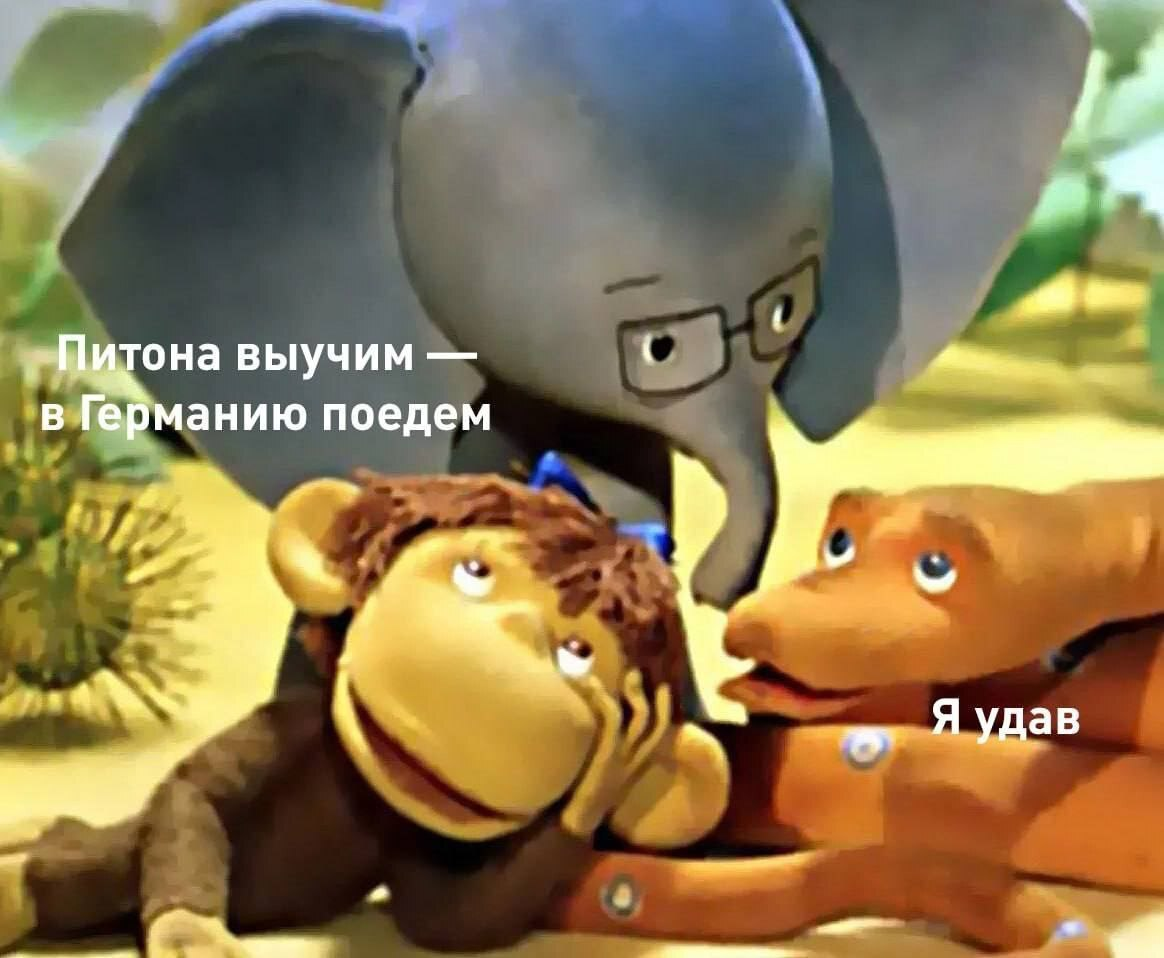

## SciPy

SciPy — это библиотека Python с открытым исходным кодом, предназначенная для решения научных и математических проблем. Она построена на базе NumPy и позволяет управлять данными, а также визуализировать их с помощью разных высокоуровневых команд. Если вы импортируете SciPy, то NumPy отдельно импортировать не нужно.

В SciPy есть набор пакетов для разных научных вычислений:  


| Название    | Описание                                                  |
|-------------|-----------------------------------------------------------|
| cluster     | Алгоритмы кластерного анализа                             |
| constants   | Физические и математические константы                     |
| fftpack     | Быстрое преобразование Фурье                              |
| integrate   | Решения интегральных и обычных дифференциальных уравнений |
| interpolate | Интерполяция и сглаживание сплайнов                       |
| io          | Ввод и вывод                                              |
| linalg      | Линейная алгебра                                          |
| ndimage     | N-размерная обработка изображений                         |
| odr         | Метод ортогональных расстояний                            |
| optimize    | Оптимизация и численное решение уравнений                 |
| signal      | Обработка сигналов                                        |
| sparse      | Разреженные матрицы                                       |
| spatial     | Разреженные структуры данных и алгоритмы                  |
| special     | Специальные функции                                       |
| stats       | Статистические распределения и функции                    |

SciPy построена на базе NumPy, поэтому можно использовать функции последней для работы с массивами. Чтобы узнать о них подробнее, используйте функции help(), info() или source().

In [1]:
from scipy import cluster
help(cluster)               # с параметром
help()                      # без параметра

Help on package scipy.cluster in scipy:

NAME
    scipy.cluster

DESCRIPTION
    Clustering package (:mod:`scipy.cluster`)
    
    .. currentmodule:: scipy.cluster
    
    .. toctree::
       :hidden:
    
       cluster.vq
       cluster.hierarchy
    
    Clustering algorithms are useful in information theory, target detection,
    communications, compression, and other areas. The `vq` module only
    supports vector quantization and the k-means algorithms.
    
    The `hierarchy` module provides functions for hierarchical and
    agglomerative clustering.  Its features include generating hierarchical
    clusters from distance matrices,
    calculating statistics on clusters, cutting linkages
    to generate flat clusters, and visualizing clusters with dendrograms.

PACKAGE CONTENTS
    _hierarchy
    _optimal_leaf_ordering
    _vq
    hierarchy
    tests (package)
    vq

DATA
    __all__ = ['vq', 'hierarchy']

FILE
    /usr/local/lib/python3.10/dist-packages/scipy/cluster/__ini

In [10]:
import scipy

### Набор **специальных** функций SciPy включает такие, с помощью которых можно искать экспоненты и решать тригонометрические задачи.

In [2]:
from scipy import special
a = special.exp10(3)
print(a)

b = special.exp2(3)
print(b)

c = special.sindg(90)
print(c)

d = special.cosdg(45)
print(d)

1000.0
8.0
1.0
0.7071067811865475


### Интегральные функции

Есть и функции для решения интегралов. В их числе как обычные дифференциальные интеграторы, так и методы трапеций.

В SciPy представлена функция **quad**, которая занимается вычислением интеграла функции с одной переменной. Границы могут быть **±∞** **(±inf)** для обозначения бесконечных пределов. Синтаксис этой функции следующий:  

In [ ]:
quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08,
epsrel=1.49e-08, limit=50, points=None, weight=None,
wvar=None, wopts=None, maxp1=50, limlst=50)




> The first element holding the estimated value of the integral and the second element holding an estimate of the absolute integration error.





In [15]:
from scipy import special
from scipy import integrate
a = lambda x:special.exp10(x)
b = scipy.integrate.quad(a, 0, 1)
print(b)

(3.9086503371292665, 4.3394735994897923e-14)


### Двойные интегральные функции  
SciPy включает также и **dblquad**, которая используется для вычисления двойных интегралов. Двойной интеграл, как известно, состоит из двух реальных переменных. Функция **dblquad()** принимает функцию, которую нужно интегрировать, в качестве параметра, а также 4 переменных: две границы и функции **dy** и **dx**.

Пример:

In [16]:
from scipy import integrate
a = lambda y, x: x*y**2
b = lambda x: 1
c = lambda x: -1
integrate.dblquad(a, 0, 2, b, c)

(-1.3333333333333335, 1.4802973661668755e-14)

### Функции оптимизации
В **scipy.optimize** есть часто используемые алгоритмы оптимизации:




*   Неограниченная и ограниченная минимизация многомерных скалярных функций, то есть **minimize** (например, Алгоритм Бройдена — Флетчера — Гольдфарба — Шанно, метод сопряженных градиентов, метод Нелдера — Мида и так далее)
*   Глобальная оптимизация (дифференциальная эволюция, двойной отжиг и т. д.)
*   Минимизация наименьших квадратов и подбор кривой (метод наименьших квадратов, приближение с помощью кривых и т. д.)
*   Минимизаторы скалярных одномерных функций и численное решение уравнений (минимизация скаляра и скаляр корня)
*   Решатели систем многомерных уравнений с помощью таких алгоритмов, как Пауэлла, Левендберга — Марквардта.

**Поиск корня**    

**scipy.optimize.root_scalar()** пытается найти корень указанной скалярной функции (т. е. аргумент, при котором значение функции равно нулю). Как и многим функциям **scipy.optimize**, функции требуется начальное предположение решения, которое алгоритм будет уточнять до тех пор, пока не сойдется или не распознает неудачу. Мы также предоставляем производную для улучшения скорости сходимости.

In [8]:
import scipy as sp
def f(x):
    return (x-1)*(x-2)
def df(x):
    return 2*x - 3

x0 = 2.5  # guess
res = sp.optimize.root_scalar(f, x0=x0, fprime=df)
res

      converged: True
           flag: converged
 function_calls: 12
     iterations: 6
           root: 2.0
         method: newton

Обратите внимание, что найден только один корень - 1.0. При осмотре мы можем сказать, что есть второй корень - 2.0. Мы можем 'направить' функцию к конкретному корню, изменив предположение или передав скобку, которая содержит только искомый нами корень.

In [9]:
res = sp.optimize.root_scalar(f, bracket=(1.5, 10))
res.root

2.0

Для многомерных задач используйте **scipy.optimize.root()**.

In [11]:
import numpy as np

def f(x):
    # intersection of unit circle and line from origin
    return [x[0]**2 + x[1]**2 - 1,
            x[1] - x[0]]
res = sp.optimize.root(f, x0=[0, 0])
np.allclose(f(res.x), 0, atol=1e-10)
np.allclose(res.x, np.sqrt(2)/2)

True

In [13]:
def f(x):
    # intersection of unit circle, line from origin, and parabola
    return [x[0]**2 + x[1]**2 - 1,
            x[1] - x[0],
            x[1] - x[0]**2]
res = sp.optimize.root(f, x0=[1, 1], method='lm')
res.success
res.x

array([0.76096066, 0.66017736])

**Curve fitting**  


Сгенерируем немного данных:

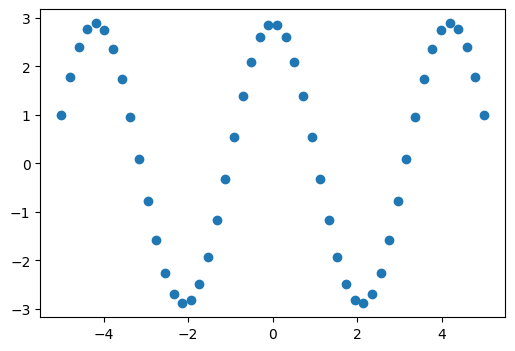

In [14]:
import numpy as np

# Seed the random number generator for reproducibility
rng = np.random.default_rng(27446968)

x_data = np.linspace(-5, 5, num=50)
noise = 0.01 * np.cos(100 * x_data)
a, b = 2.9, 1.5
y_data = a * np.cos(b * x_data) + noise

# And plot it
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data)


Теперь подгоним простую функцию синуса к данным

In [15]:
import scipy as sp


def test_func(x, a, b, c):
    return a * np.sin(b * x + c)


params, params_covariance = sp.optimize.curve_fit(
    test_func, x_data, y_data, p0=[2, 1, 3]
)

print(params)

[2.900026   1.50012043 1.57079633]


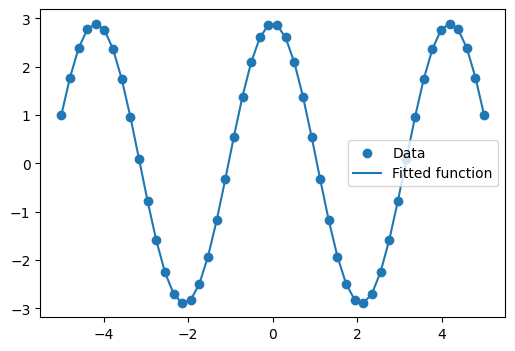

In [3]:
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label="Data")
plt.plot(x_data, test_func(x_data, *params), label="Fitted function")

plt.legend(loc="best")

plt.show()

Рассмотрим ещё пример использования optimize.curve_fit()

In [17]:
import pandas as pd

data = pd.read_csv("plasma_test.csv", sep=';', header=None)
x_data = data[0]
y_data = data[1]
print(x_data)

0    -76.4
1    -76.8
2    -76.0
3    -63.7
4    -51.1
5    -21.3
6    -11.4
7     -5.9
8     -2.8
9      0.4
10     2.3
11     5.1
12     8.0
13    11.1
14    15.6
15    18.9
16    26.1
17    34.0
18    44.1
19    54.6
20    64.2
21    70.2
22    75.5
23    76.4
Name: 0, dtype: float64



Найденные параметры:
alpha = 0.283,
beta = 0.121,
gamma = 0.005,
teta = -0.036



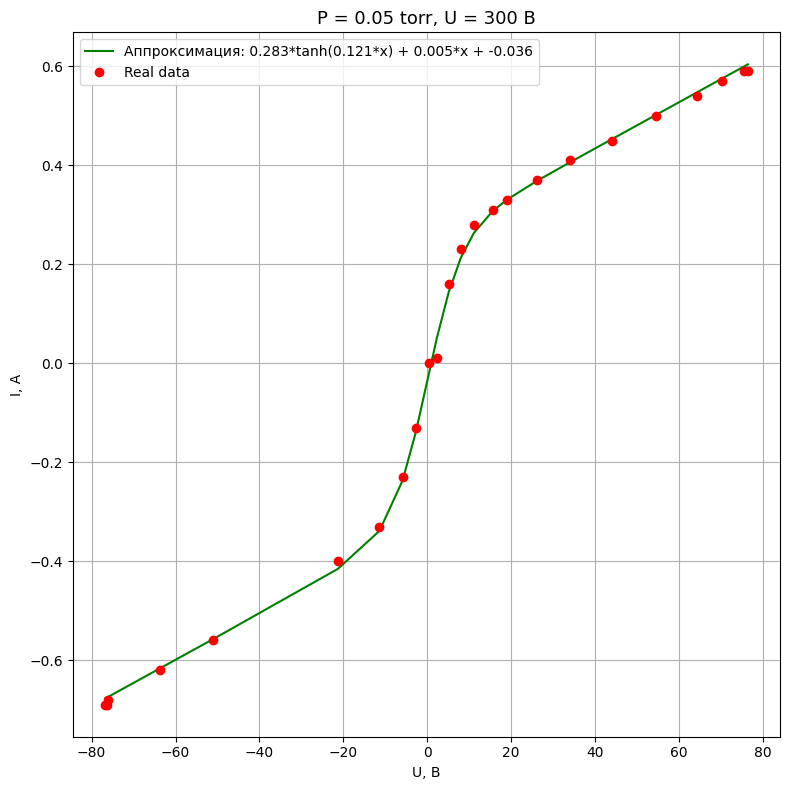

In [18]:
from scipy import optimize

def approximation(x, alpha, beta, gamma, teta):
    return alpha * np.tanh(beta*x) + gamma*x + teta

(alpha, beta, gamma, teta), _ = optimize.curve_fit(approximation, x_data, y_data)


fig, ax = plt.subplots(figsize=(8, 8), layout="tight")
plt.title('P = 0.05 torr, U = 300 B', fontsize=13)
plt.xlabel('U, B', color='black')
plt.ylabel('I, A',color='black')
ax.plot(x_data, approximation(x_data, alpha, beta, gamma, teta), color="green", label=f"Аппроксимация: {alpha:.3f}*tanh({beta:.3f}*x) + {gamma:.3f}*x + {teta:.3f}")
ax.plot(x_data, y_data, 'ro', label="Real data")
ax.grid(True)
ax.legend()

print(f"""
Найденные параметры:
{alpha = :.3f},
{beta = :.3f},
{gamma = :.3f},
{teta = :.3f}
""")
plt.savefig('tanh_test.png')

Предположим, мы хотим минимизировать скалярную функцию одной переменной f(x) = x^2  + 10*sin(x):

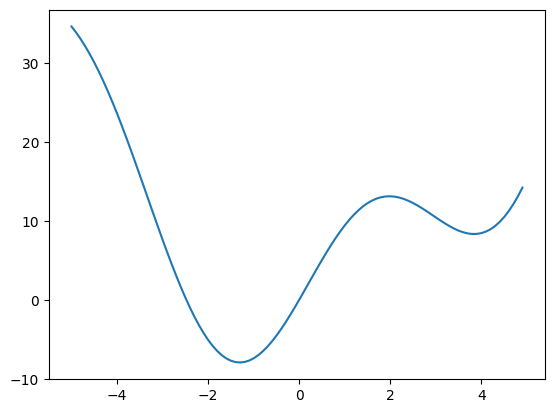

In [20]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return x**2 + 10 * np.sin(x)


x = np.arange(-5, 5, 0.1)
plt.plot(x, f(x))


Мы видим, что функция имеет локальный минимум вблизи x = 3,8 и глобальный минимум вблизи x = -1,3, но точные значения не могут быть определены из графика.  
Наиболее подходящей функцией для этой цели является **scipy.optimize.minimize_scalar()**. Поскольку мы знаем приблизительные местоположения минимумов, мы предоставим границы, которые ограничат поиск окрестностями глобального минимума.

In [22]:
res = sp.optimize.minimize_scalar(f, bounds=(-2, -1))
res
res.fun == f(res.x)

True

Если мы еще не знаем приблизительное местоположение глобального минимума, мы можем использовать один из глобальных минимизаторов **SciPy**, например **scipy.optimize.differential_evolution()**. Нам необходимо передать границы, но они не должны быть жесткими.

In [7]:
bounds=[(-5, 5)]  # list of lower, upper bound for each variable
res = sp.optimize.differential_evolution(f, bounds=bounds)
res

             message: Optimization terminated successfully.
             success: True
                 fun: -7.945823375615165
                   x: [-1.306e+00]
                 nit: 6
                nfev: 111
          population: [[-1.309e+00]
                       [-1.406e+00]
                       ...
                       [-1.316e+00]
                       [-1.313e+00]]
 population_energies: [-7.946e+00 -7.888e+00 ... -7.945e+00 -7.946e+00]
                 jac: [-1.599e-06]

Для многомерной оптимизации хорошим выбором для многих задач является **scipy.optimize.minimize()**. Предположим, мы хотим найти минимум квадратичной функции двух переменных,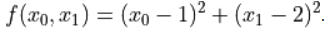

In [23]:
def f(x):
    return (x[0] - 1)**2 + (x[1] - 2)**2

Как и **scipy.optimize.root()**, **scipy.optimize.minimize()** требует предположения x0. (Обратите внимание, что это начальное значение обеих переменных, а не значение переменной, которую мы случайно обозначили как x_0.)

In [24]:
res = sp.optimize.minimize(f, x0=[0, 0])
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.705780445775116e-16
        x: [ 1.000e+00  2.000e+00]
      nit: 2
      jac: [ 3.219e-09 -8.462e-09]
 hess_inv: [[ 9.000e-01 -2.000e-01]
            [-2.000e-01  6.000e-01]]
     nfev: 9
     njev: 3

**Функция Розенброка**  
Функция Розенброка (**rosen**) — это тестовая проблема для оптимизационных алгоритмов, основанных на градиентах. В SciPy она определена следующим образом:  
(Методы оптимизации используются для нахождения экстремумов функций, применяются при обучении нейросетей)

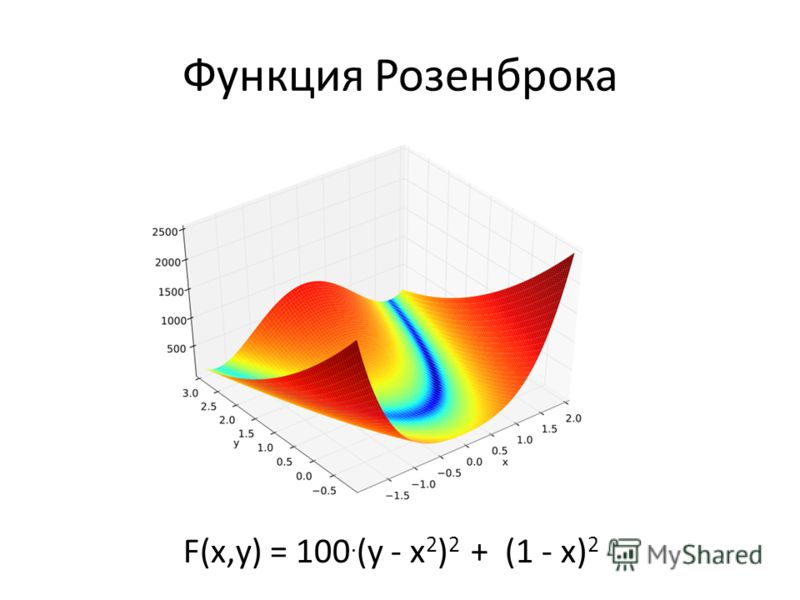

In [25]:
sum(100.0*(x[1:] - x[:-1]**2.0)**2.0 + (1 - x[+-1])**2.0)

1307881.079999993

In [26]:
import numpy as np
from scipy.optimize import rosen
a = 1.2 * np.arange(5)
rosen(a)

7371.0399999999945

**Nelder-Mead**  
Это числовой метод, который часто используется для поиска минимума/максимума функции в многомерном пространстве. В следующем примере метод использован вместе с **алгоритмом Нелдера — Мида**.  
(метод безусловной оптимизации функции от нескольких переменных. Не использует производной (точнее — градиентов) функции, а поэтому легко применим к негладким и/или зашумлённым функциям)

In [27]:
from scipy import optimize
a = [2.4, 1.7, 3.1, 2.9, 0.2]
b = optimize.minimize(optimize.rosen, a, method='Nelder-Mead')
b.x

array([0.96570182, 0.93255069, 0.86939478, 0.75497872, 0.56793357])

### Функции интерполяции  
В сфере числового анализа интерполяция — это построение новых точек данных на основе известных. Библиотека SciPy включает подпакет **scipy.interpolate**, состоящий из сплайновых функций и классов, одно- и многомерных интерполяционных классов и так далее.

**Одномерная интерполяция**  

Одномерная интерполяция — это область построения кривой, которая бы полностью соответствовала набору двумерных точек данных. В SciPy есть функция interp1d, которая используется для создания одномерной интерполяции.

[ 6  7  8  9 10 11]


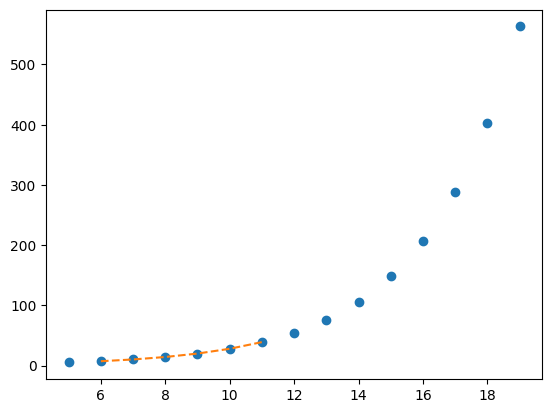

In [21]:
import matplotlib.pyplot as plt
from scipy import interpolate
x = np.arange(5, 20)
y = np.exp(x/3.0)
f = interpolate.interp1d(x, y)
x1 = np.arange(6, 12)
print(x1)
y1 = f(x1)   # использовать функцию интерполяции, возвращаемую `interp1d`
plt.plot(x, y, 'o', x1, y1, '--')
plt.show()

**Многомерная интерполяция**  
Многомерная интерполяция (пространственная интерполяция) — это тип интерполяции функций, который состоит из более чем одной переменной. Следующий пример демонстрирует работу функции interp2a.  

При интерполяции на двумерную сетку функция использует массивы x, y и z для приближения функции **f: "z = f(x, y)"** и возвращает функцию, у которой вызываемый метод использует сплайновую интерполяцию для поиска значения новых точек.

Пример:

<ipython-input-28-b521f52eb10d>:7: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f = interpolate.interp2d(x, y, z, kind='cubic')
<ipython-input-28-b521f52eb10d>:10: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`Clough

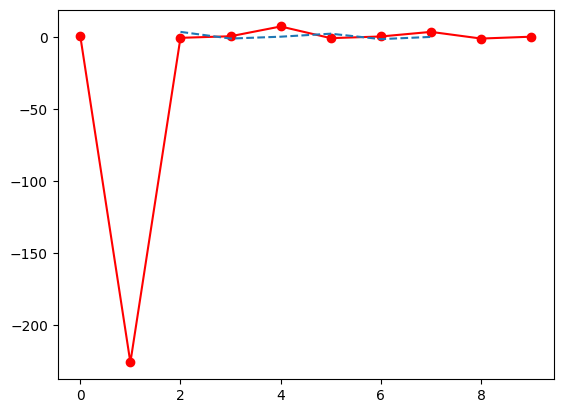

In [28]:
from scipy import interpolate
import matplotlib.pyplot as plt
x = np.arange(0,10)
y = np.arange(10,25)
x1, y1 = np.meshgrid(x, y)
z = np.tan(x1+y1)
f = interpolate.interp2d(x, y, z, kind='cubic')
x2 = np.arange(2,8)
y2 = np.arange(15,20)
z2 = f(x2, y2)
plt.plot(x, z[0, :], 'ro-', x2, z2[0, :], '--')
plt.show()

На практике, когда хотят как-то определить промежуточные значения функции, заданной на сетке, использовать сразу же многочлен n-ой степени - очень плохая идея. Возникает ситуация схожая с переобучением:

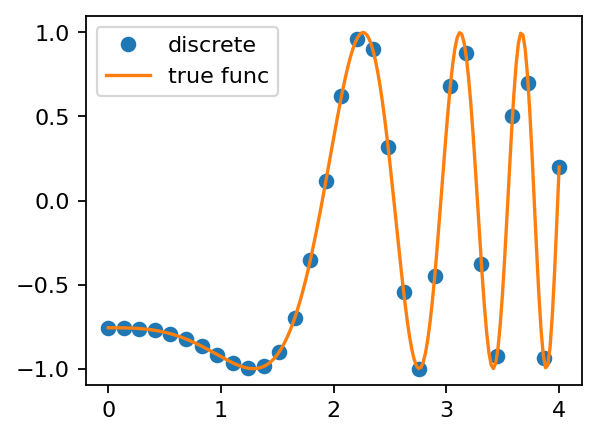

In [29]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 4, 30)
y = np.sin(x**3/3+4)

x_dens = np.linspace(0, 4, 200)
y_dens = np.sin(x_dens**3/3+4)

plt.figure(figsize=(4, 3), dpi=160)

plt.plot(x, y, 'o', x_dens, y_dens, '-')
plt.legend(['discrete', 'true func'], loc = 'best')
plt.show()

Самый простой выход из ситуации - использовать интерполяционный многочлен меньшей степени на своём наборе точек.

К примеру, будет интерполировать параболой. Разобъём весь набор точек на тройки, и на каждой тройке проинтерполируем параболой. Итоговая интерполяция будет кусочно-заданная функция, на каждом интервале которой будет нарисована соответствующая парабола.

Такая штука является самым простым сплайном. Для большей точности могли бы гладко склеивать полиномы в их точках соприкосновения, но об этом позже.

Создадим данные и посмотрим, как можно выполнить такую интерполяцию с помощью пакета **scipy.interpolate:**

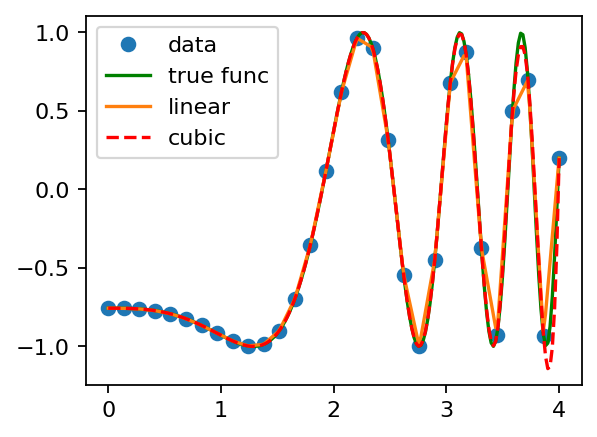

In [33]:
from scipy import interpolate

f1 = interpolate.interp1d(x, y, kind = 'linear') # Определяем вид интерполяции, т.е. какой многочлен использовать

f2 = interpolate.interp1d(x, y, kind = 'cubic')

plt.figure(figsize=(4, 3), dpi=160)
plt.plot(x, y, 'o', x_dens, y_dens, 'g-', x_dens, f1(x_dens), '-', x_dens, f2(x_dens), 'r--')
plt.legend(['data','true func', 'linear', 'cubic'], loc = 'best')
plt.show()

Т.е. интерполяцию вполне себе можно применять для приближения функции кусочно-заданным многочленом.

Некоторые виды интерполянтов, известные как «сглаживающие сплайны», предназначены для создания гладких кривых из зашумленных данных. Например, предположим, что у нас есть следующие данные:

In [30]:
# Generate data
import numpy as np

rng = np.random.default_rng(27446968)
measured_time = np.linspace(0, 2 * np.pi, 20)
function = np.sin(measured_time)
noise = rng.normal(loc=0, scale=0.1, size=20)
measurements = function + noise

**scipy.interpolate.make_smoothing_spline()** можно использовать для формирования кривой, аналогичной базовой функции синуса:

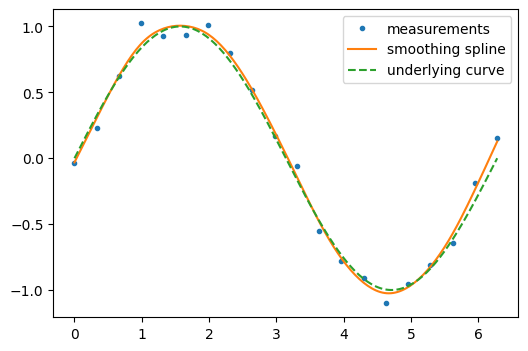

In [31]:
# Smooth the curve and interpolate at new times
import scipy as sp

smoothing_spline = sp.interpolate.make_smoothing_spline(measured_time, measurements)
interpolation_time = np.linspace(0, 2 * np.pi, 200)
smooth_results = smoothing_spline(interpolation_time)

# Plot the data, the interpolant, and the original function
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(measured_time, measurements, ".", ms=6, label="measurements")
plt.plot(interpolation_time, smooth_results, label="smoothing spline")
plt.plot(interpolation_time, np.sin(interpolation_time), "--", label="underlying curve")
plt.legend()
plt.show()

Методы производной **(derivative)** и первообразной **(antiderivative)** результирующего объекта могут быть использованы для дифференцирования и интегрирования. Для последнего константа интегрирования предполагается равной нулю, но мы можем «обернуть» первообразную, чтобы включить ненулевую константу интегрирования.

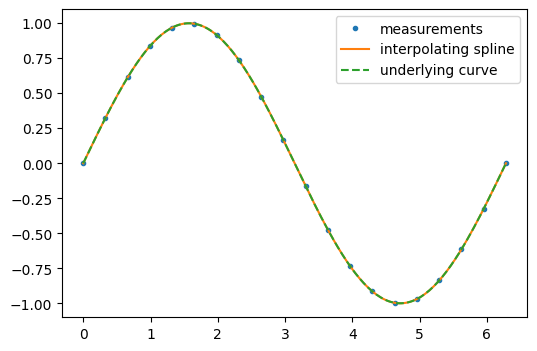

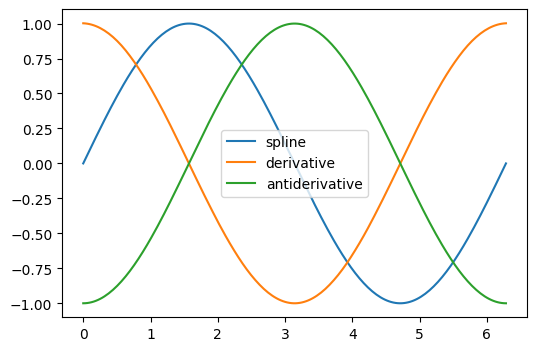

In [60]:
# Fit the data exactly
interp_spline = sp.interpolate.make_interp_spline(measured_time, function)
interp_results = interp_spline(interpolation_time)

# Plot the data, the interpolant, and the original function
plt.figure(figsize=(6, 4))
plt.plot(measured_time, function, ".", ms=6, label="measurements")
plt.plot(interpolation_time, interp_results, label="interpolating spline")
plt.plot(interpolation_time, np.sin(interpolation_time), "--", label="underlying curve")
plt.legend()
plt.show()

# Plot interpolant, its derivative, and its antiderivative
plt.figure(figsize=(6, 4))
t = interpolation_time
plt.plot(t, interp_spline(t), label="spline")
plt.plot(t, interp_spline.derivative()(t), label="derivative")
plt.plot(t, interp_spline.antiderivative()(t) - 1, label="antiderivative")

plt.legend()
plt.show()

### Функции преобразования Фурье
Анализ Фурье — это метод, который помогает представлять функцию в виде суммы периодических компонентов и восстанавливать сигнал из них. Функции **fft** используются для получения дискретной трансформации Фурье реальной или комплексной последовательности.

In [34]:
from scipy.fftpack import fft, ifft
x = np.array([0,1,2,3])
y = fft(x)
print(y)

[ 6.-0.j -2.+2.j -2.-0.j -2.-2.j]


Похожим образом можно найти обратное значение с помощью функции ifft.

In [35]:
from scipy.fftpack import fft, ifft
x = np.array([0,1,2,3])
y = ifft(x)
print(y)

[ 1.5-0.j  -0.5-0.5j -0.5-0.j  -0.5+0.5j]


### Функции обработки сигналов

Обработка сигналов — это область анализа, модификации и синтеза сигналов: звуков, изображений и т. д. SciPy предоставляет некоторые функции, с помощью которых можно проектировать, фильтровать и интерполировать одномерные и двумерные данные.

**Фильтрация:**

Фильтруя сигнал, можно удалить нежелаемые составляющие. Для выполнения упорядоченной фильтрации используется функция **order_filter**. Она выполняет операцию на массиве. Синтаксис следующий:

In [ ]:
order_filter(a, domain, rank)

**a** — N-мерный массив с входящими данными

**domain** — массив масок с тем же количеством размерностей, что и у массива a

**rank** — неотрицательное число, которое выбирает элементы из отсортированного списка (0, 1…)

Пример:

In [39]:
from scipy import signal
x = np.arange(35).reshape(7, 5)
domain = np.identity(5)
print(x,end='\n\n')
print(signal.order_filter(x, domain, 1))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32 33 34]]

[[ 0  0  0  0  0]
 [ 0  0  1  0  0]
 [ 0  5  6  1  0]
 [ 0 10 11  6  0]
 [ 0 15 16 11  0]
 [ 0  0 15 16  0]
 [ 0  0  0  0  0]]


**Сигналы**

Подпакет **scipy.signal** также состоит из функций, с помощью которых можно генерировать сигналы. Одна из таких — **chirp**. Она является генератором частотно-модулированного сигнала, а ее синтаксис следующий:

In [ ]:
chirp(t, f0, t1, f1, method='linear', phi=0, vertex_zero=True)

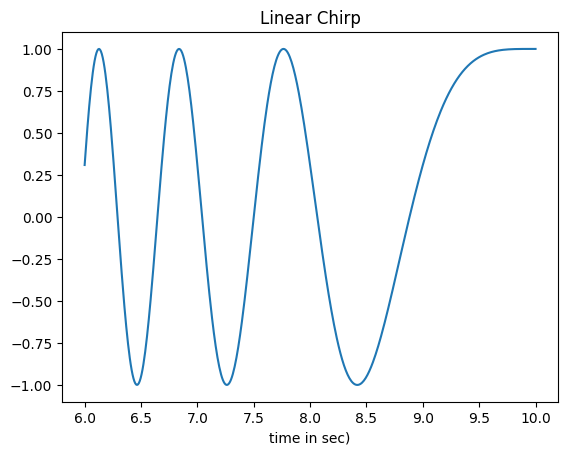

In [40]:
from scipy.signal import chirp, spectrogram
import matplotlib.pyplot as plt
t = np.linspace(6, 10, 500)
w = chirp(t, f0=4, f1=2, t1=5, method='linear')
plt.plot(t, w)
plt.title("Linear Chirp")
plt.xlabel('time in sec)')
plt.show()

### Линейная алгебра
Линейная алгебра работает с линейными уравнениями и их представлениями с помощью векторных пространств и матриц. **SciPy** построена на базе библиотек **ATLAS** **LAPACK** и **BLAS** и является очень быстрой в сфере решения проблем, связанных с линейной алгеброй. В дополнение к функциям из **numpy.linalg** **scipy.linalg** также предоставляет набор продвинутых функций. Если **numpy.linalg** не используется вместе с **ATLAS LAPACK и BLAS**, то **scipy.linalg** работает намного быстрее.

**Нахождение обратной матрицы**
С математической точки зрения обратная матрица A — это матрица B, где AB = I, а I — это единичная матрица, состоящая из единиц по диагонали. Это можно обозначить как B=A-1. В **SciPy** такого можно добиться с помощью метода **linalg.inv.**

Пример:

In [41]:
import numpy as np
from scipy import linalg
A = np.array([[1,2], [4,3]])
B = linalg.inv(A)
print(B)

[[-0.6  0.4]
 [ 0.8 -0.2]]


**Нахождение определителей**  
Значение, полученное арифметическим путем из коэффициентов матрицы является определителем квадратной матрицы. В **SciPy** это делается с помощью функции **det** с таким синтаксисом:

**det(a, overwrite_a=False, check_finite=True)**

**a** — (M, M) — это квадратная матрица

**overwrite_a(bool, optional)** — разрешает перезаписывать данные


**check_finite(bool, optional)** — для проверки состоит ли матрица только из конечных чисел

Пример:

In [33]:
import numpy as np
from scipy import linalg
A = np.array([[1,2], [4,3]])
B = linalg.det(A)
print(B)


-5.0


Математически, решение линейной системы Ax = b есть x = A^{-1}b, но явное обращение матрицы численно нестабильно и его следует избегать. Вместо этого используйте **scipy.linalg.solve()**:

In [35]:
A = np.array([[1, 2],
              [2, 3]])
b = np.array([14, 23])
x = linalg.solve(A, b)
x
np.allclose(A @ x, b)

True

### Модуль io
Данный пакет предоставляет функции для работы и управления файлами самых разных форматов, включая MATLAB, файлы IDL, Matrix Market, Fortran, и даже WAV. Ниже рассмотрим кусок кода, который покажет каким образом можно добавить данные из файла формата MATLAB.

In [37]:
# импортируем пакет io из библиотеки scipy
from scipy import io as spio
import numpy as np

# создадим массив, который запишем в MATLAB файл;
x = np.ones((3,3))

# покажем только что созданный массив;
print('Array from Python')
print(x)

# запишем массив в MATLAB файл;
spio.savemat('f.mat', {'a':x})

# загрузим массив из MATLAB файла;
data = spio.loadmat('f.mat',struct_as_record=True)

# покажем только что загруженный массив;
print('Array from Matlab File')
print(data['a'])

Array from Python
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
Array from Matlab File
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


### Модуль Stats

Данный модуль, содержит в себе большое количество вероятностных распределений, а также растущую библиотеку статистических функций. Для демонстрации возможностей рассматриваемого модуля, обратимся к коду ниже. В нем мы проведем проверку на нормальное распределение.

В основе проверки на "нормальность" лежит проверка гипотез. Для проверки будем использовать две гипотезы. Истинная гипотеза говорит о нормальном распределении данных, а ложная подтверждает отсутствие нормального распределения.

Для проведения проверки будем использовать критерией Шапиро-Уилка. В результате проверки мы получим значение вычисленной статистики и p-значение. Для определения принадлежности результата к гипотезе, будем использовать критический параметр альфа со значением 0,05. В случае, если p-значение будет меньше 0,05, можно утверждать, что гипотеза ложная и данные не имею нормального распределения, иначе данные распределены нормально.

Для проверки будем использовать набор данных с информацией о продаже видеоигр по всему миру с сайта Kaggle по ссылке: https://www.kaggle.com/datasets/gregorut/videogamesales?resource=download. Проверяемым атрибута выберем EU_Sales (продажи в Европе):

In [39]:
import pandas as pd

# загрузим набор данных
data = pd.read_csv('vgsales.csv')

# просмотрим несколько строк из набора данных
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [48]:
# выведем некоторые статистики
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [50]:
import scipy as sc

# запустим тест Шапиро-Уилка
statistics, p_Value = sc.stats.shapiro(data['EU_Sales'])

# выведем результаты теста Шапиро-Уилка
print('Stats=%.3f, pValue=%.3f' % (statistics, p_Value))

alpha = 0.05

#Выведем результаты о принятии или отклонении гипотезы о нормальности
if p_Value > alpha:
  print('Данные распределены нормально')
else:
 print('Данные не имеют нормального распределения')

Stats=0.256, pValue=0.000
Данные не имеют нормального распределения


## Численное дифференциирование

### Постановка задачи для 1-ой производной

Пусть таблично задана некоторая функция $u(x)$:

$$
\begin{array}{|l|l|l|l|l|l|l|l|}
\hline u(x) & u\left(x_0\right) & u_1 & u_2 & \cdots & u_j & \cdots & u_J \\
\hline x & x_0 & x_1 & x_2 & \cdots & x_j & \cdots & x_J \\
\hline
\end{array}
$$

Как раз в такой форме задана любая функция в компьютере (массив "иксов" и массив "игреков"). Отметим, что разбиение по "иксам" может быть как равномерным, так и неравномерным - всё зависит от конкретной табдично заданной функции.

Хотим вычислить её производную в каждой точке $x_j$. Вспомним определение из матанализа:

$$u'\left(x_j\right)=\lim _{\Delta x \rightarrow 0} \frac{u\left(x_j+\Delta x\right)-u\left(x_j\right)}{\Delta x}$$

Но ведь на компьютере $\Delta x$ не может стремится к нулю, т.к. функция по сути дискретная, - придётся считать приближённо, с помощью аппроксимации производной путём использования __конечно-разностных схем__. Некоторые примеры:

</br>

a) $u_j^{(1)}=\cfrac{u_j-u_{j-1}}{x_j-x_{j-1}}=\cfrac{u_j-u_{j-1}}{h}$

</br>

b) $u_j^{(1)}=\cfrac{u_{j+1}-u_j}{x_{j+1}-x_j}=\cfrac{u_{j+1}-u_j}{h}$

</br>

c) $u_j^{(1)}=\cfrac{u_{j+1} - u_{j-1}}{x_{j+1}-x_{j-1}}=\cfrac{u_{j+1}-u_{j-1}}{2 h}$

</br>

Подчеркнём разницу между обозначениями $u'$ и $u^{(1)}$. $u'$ - это истинная (математическая) производная, а $u^{(1)}$ - это лишь аппроксимация (наше приблежение).


### Порядок аппроксимации

Чем же отличаются данные схемы? Оказывается, точностью. Но сначала вспомним про ряд Тейлора с остаточным членом в форме Лагранжа и Пеано:

$$
\begin{aligned}
&u\left(x_j+\Delta x\right)=u\left(x_j\right)+u^{\prime}\left(x_j\right) \cdot \Delta x+u^{\prime \prime}\left(x_j\right) \frac{\Delta x^2}{2 !}
+u^{\prime \prime \prime}\left(x_j\right) \frac{\Delta x^3}{3 !}+\cdots+u^{(n)}\left(x_i\right) \frac{\Delta x^n}{n !}+\frac{u^{(n+1)}(\xi)}{(n+1) !} \Delta x^{n+1}=\sum_{k=0}^n \frac{u^{(k)}\left(x_j\right)}{k !} \Delta x^k+O\left(\Delta x^{n+1}\right)
\end{aligned}
$$

Подставляя это разложение в наши примеры, посмотрим на их "точность":

---

a) $u_j^{(1)}=\cfrac{u_j-u_{j-1}}{x_j-x_{j-1}}=\cfrac{u_j-u_{j-1}}{h}$

...


---

b) $u_j^{(1)}=\cfrac{u_{j+1}-u_j}{x_{j+1}-x_j}=\frac{u_{j+1}-u_j}{h}$

...

---

c) $u_j^{(1)}=\cfrac{u_{j+1} - u_{j-1}}{x_{j+1}-x_{j-1}}=\frac{u_{j+1}-u_{j-1}}{2 h}$

...

Итого мы поняли, что задачу приближённого нахождения производной (аппроксимации производной) можно решать с помощью конечно-разностных схем. Разные схемы могут иметь разную точность. Обобщим задачу на случай производной произвольной степени.

## Погрешность метода  
Многие методы вычислительной математики являются приближенными, то есть позволяют получить ответ с заданной точностью. Крайне важно уметь определять погрешность, обусловленную использованием приближенного метода. Такая погрешность называется **ошибкой метода**. По сути это есть разница между истинным (математическим) значением и тем, который мы получаем при вычислении.
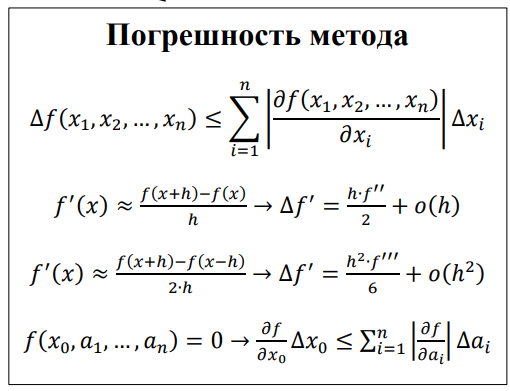  



---

- Конечно-разностная схема первого порядка

$$f_j^{(1)}=\frac{f_{j+1}-f_j}{x_{j+1}-x_j}=\frac{f_{j+1}-f_j}{h}$$

Обозначим $x_j = x_0$. Тогда погрешность метода будет равна

$$
\varepsilon_{\text{method}}=\left|f'(x_0) - \frac{f(x_0 + h) - f(x_0)}{h}\right|
$$

Воспользуемся формулой Тейлора с остаточным членом в форме Лагранжа:

$$
f(x_0 + h) = f(x_0) + f'(x_0) h + \frac{f''(\xi)}{2} h^2, \;\; \xi \in [x_0, x_0 + h]\\
\left|f'(x_0) - \frac{f(x_0 + h) - f(x_0)}{h}\right| = \frac{|f''(\xi)|h}{2}
$$

Пусть известно, что $|f''(\xi)| \leq M_2$ - верхняя оценка второй производной. Тогда ошибку (погрешность) метода можно оценить как

$$
\varepsilon_\text{method}=\left|f'(x_0) - \frac{f(x_0 + h) - f(x_0)}{h}\right| \leqslant  \frac{M_2 h}{2}
$$

Итого, максимальная погрешности метода

$$\varepsilon_\text{method} = \frac{M_2 h}{2}$$

Отсюда также видно, что данная конечно-разностная схема имеет 1-ый порядок аппроксимации.

---

- Конечно-разностная схема второго порядка

$$
f^{(1)}(x) = \frac{f(x + h) - f(x - h)}{2h}.
$$

Пользуясь такими же разложениями

$$
f(x_0 \pm h) = f(x_0) \pm f'(x_0) h + \frac{f''(x_0)}{2} h^2 \pm \frac{f'''(\xi_{1,2})}{6} h^3,\\
\xi_1 \in [x_0 - h, x_0], \xi_2 \in [x_0, x_0 + h],
$$

заключаем, что

$$
\varepsilon_\text{method}=\left|f'(x_0) - \frac{f(x_0 + h) - f(x_0 - h)}{2h}\right| = \frac{|f'''(\xi_2) + f'''(\xi_1)|h^2}{12},\\
\left|f'(x_0) - \frac{f(x_0 + h) - f(x_0 - h)}{2h}\right| \leqslant  \frac{M_3 h^2}{6}, \qquad M_3 = \max |f'''(\xi)|
$$

Опять же видим, что данный метод имеет *второй порядок*, так как $\varepsilon_\text{method} = O(h^2)$.

### Приближённое вычисление функции

Погрешность метода вводится не только для разностных схем, но вообще для любого алгоритма, выполняемого на компьютере. К примеру, расчет функции $f(x)=\sin x$ в некоторой точке через её ряд Тейлора.

Для функции $\sin x$ ряд Тейлора в окрестности точки $x=0$ выглядит следующим образом
$$
\sin x=x-\frac{x^3}{6}+\frac{x^5}{120}+\cdots=\sum_{k=0}^{\infty}(-1)^k \frac{x^{2 k+1}}{(2 k+1) !}
$$

Радиус сходимости у такого ряда бесконечный, так что можем им пользоваться для нахождения значения функции в любой точке. Но как суммировать бесконечный ряд на компьютере?

Естественно, никак нельзя. Придётся ограничиться несколькими членами этого ряда, а остаток и будет погрешностью метода в данном случае.

$$\sin x=\underbrace{\sum_{k=0}^n(-1)^k \frac{x^{2 k+1}}{(2 k+1) !}}_{S_n}+\frac{x^{2 n+2}}{(2 n+2) !} \sin ^{(2 n+2)} \xi, \quad \xi \in[0, x]$$

Как раз $S_n$ мы и вычисляем в нашей программе. Погрешность от истинного же значения будет

$$\varepsilon_{\text {method }} \equiv\left|\frac{x^{2 n+2}}{(2 n+2) !} \sin ^{(2 n+2)} \xi\right| \leqslant \frac{x^{2 n+2}}{(2 n+2) !} M_{2 n+2}$$

Так как все производные функции $\sin x$ ограничены по модулю единицей, $M_{2 n+2}=1$ и

$$
\varepsilon_{\text {method}}=\frac{x^{2 n+2}}{(2 n+2) !}
$$

При стремлении $n \rightarrow \infty$ ошибка метода начиная с $n=n_0>x / 2$ монотонно стремится к нулю благодаря факторилу в знаменателе.

## Пример аппроксимации формулой Тейлора и порядок аппроксимации  
Вычислим ниже аппроксимацию синуса разных порядков:

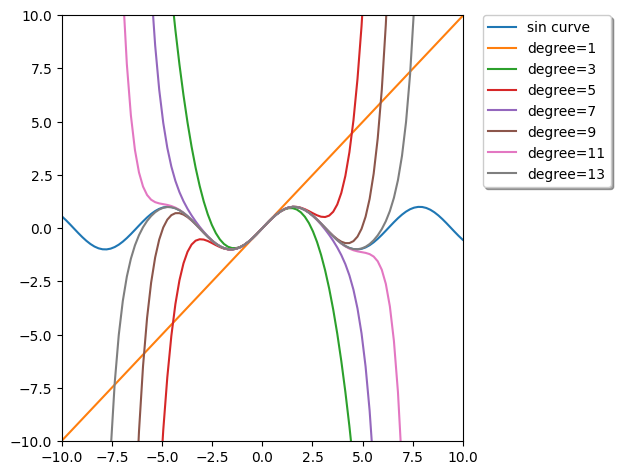

In [40]:
import matplotlib.pyplot as plt
from scipy.interpolate import approximate_taylor_polynomial

x = np.linspace(-10.0, 10.0, num=100)
plt.plot(x, np.sin(x), label="sin curve")

for degree in np.arange(1, 15, step=2):
    sin_taylor = approximate_taylor_polynomial(np.sin, 0, degree, 1,
                                               order=degree + 2)
    plt.plot(x, sin_taylor(x), label=f"degree={degree}")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           borderaxespad=0.0, shadow=True)
plt.tight_layout()
plt.axis([-10, 10, -10, 10])
plt.show()

## Погрешность машинного округления

### Представление чисел в памяти компьютера

Действительные числа в машинном представлении приходится округлять до $K$ цифр после запятой. При этом число $x$, имеющее машинное представление $X$, находится где-то в диапазоне
$$
x \in \left[X - \Delta X, X + \Delta X\right]
$$

Величина $\Delta X$ назвается **абсолютной погрешностью** представления $x$.

**Относительная погрешность** представления чисел в арифметике с плавающей точкой зависит от количества используемых цифр $K$, но не от самого числа $x$:

$$
\frac{\Delta X}{|X|} \leqslant \delta = 2^{-(K+1)}
$$

Стоит отметить, что двойка здесь потому, что числа в компьютере хранятся именно в двоичной системе счисления.

Стандартом IEEE 754 определяются несколько форматов представления чисел в компьютере. Самыми распространенными являются
 * одинарная точность, single precision (`float` в C). Имеет $K = 23$ и обеспечивает относительную точность $\delta = 2^{-24} \approx 5.96 \cdot 10^{-8}$
 * двойная точность, double precision (`double` в C). Имеет $K = 52$ и обеспечивает относительную точность $\delta = 2^{-53} \approx 1.11 \cdot 10^{-16}$

Таким образом, погрешность округления произвольного числа $A$ в компьютере можно определить, зная его тип (float или double), из которого мы получаем $\delta$. Тогда погрешность округления будет $\varepsilon_\text{round} = \delta \cdot A$.

### Накопление ошибок округления
Cуммируя величину $\displaystyle S_n = \sum_{k=0}^{n-1} a_n$
в машинной арифметике, мы на самом деле суммируем *округленные* величины. Каждое слагаемое $a_n$ представлено с абсолютной погрешностью $\Delta a_n \leqslant |a_n| \cdot \delta$, где $\delta$ — относительная ошибка округления.

Так как при суммировании чисел их абсолюная погрешность суммируется, при вычислении $S_n$ накопится ошибка
$$
\Delta S_n \leqslant \varepsilon_\text{round} = \sum_{k=0}^{n-1} |a_n| \cdot \delta = \delta \cdot \sum_{k=0}^{n-1} |a_n|.
$$

### Таблица погрешностей операций
Погрешности округления для основных операций (а только в них, как правило, умеют компьютеры) выглядят следующим образом (Здесь $\varepsilon_\text{round}=\Delta$)

$\Delta(a \pm  b)=\Delta a+\Delta b$

$\Delta\left(a^m\right)=m \cdot a^{m-1} \Delta a$

$\Delta(a \cdot b)=a \cdot b[\delta(a)+\delta(b)]=b \Delta a+a \Delta b$

$\Delta(a / b)=\frac{a}{b}[\delta(a)+\delta(b)]=\frac{b \Delta a+a \Delta b}{b^2}$

Источник: "Е.Г. Агапова - Вычислительная математика"

В случае вычислений погрешности "на бумаге", адекватной оценкой погрешности вполне может служить линейное приближение, но стоит помнить, что на компьюетере :

$$
\Delta f(x) \approx | f'(x) | \cdot \Delta x
$$